## WIPRO stock price prediction

We will follow below steps to solve this time series problem:
1. Load the stock data
2. Analyze the stock data
3. Split the data into train, test
4. Use ARIMA to predict stock price
5. Use LSTM to predict stock price. 


In [34]:
# General
from datetime import datetime

# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To download stock data
import yfinance as yf 

# Time series
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA



#### 1. Load data

In [7]:
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

wit = yf.download('WIT', start, end)

[*********************100%***********************]  1 of 1 completed


In [10]:
print('Shape of data: {0}'.format(wit.shape))

Shape of data: (1258, 6)


In [13]:
wit.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-15,4.64,4.65,4.57,4.62,4.524464,546300
2018-05-16,4.66,4.67,4.63,4.67,4.573430,414700
2018-05-17,4.66,4.68,4.62,4.63,4.534257,623100
2018-05-18,4.59,4.65,4.57,4.59,4.495085,1634900
2018-05-21,4.55,4.57,4.51,4.54,4.446118,750100


Our data is at day level and excludes weekends.
For each day, we have the opening price (Open), highest price (High), lowest price (Low), Closing price (Close), Adjusted Closing price (Adj Close) and Sales volume (Volume) 

#### 2. Analyzing stock data

In [14]:
wit.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,5.432432,5.480906,5.385477,5.434078,5.366820,1.802530e+06
std,1.703409,1.711717,1.693549,1.702374,1.686192,1.275385e+06
min,2.520000,2.650000,2.520000,2.570000,2.532681,1.163000e+05
25%,4.310000,4.340000,4.272500,4.310000,4.238556,9.284500e+05
50%,5.030000,5.080000,4.980000,5.040000,4.955366,1.473150e+06
75%,6.387500,6.420000,6.300000,6.380000,6.300763,2.346575e+06
max,9.950000,9.960000,9.870000,9.950000,9.826425,1.451150e+07


As we can see that the date is index

In [12]:
wit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-05-15 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


##### Closing price

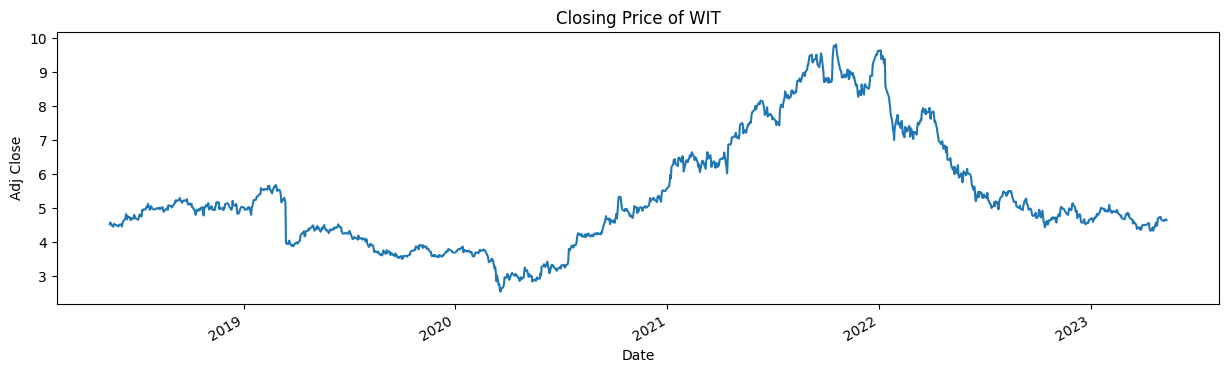

In [20]:
plt.figure(figsize=(15,4))
wit['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title('Closing Price of WIT')
plt.show()

We can see that there are multiple trends that occured during last 5 years. From 2018 to mid-2020, the seems to have declining trend while from mid-2020 to early 2022, the data has upward trend and again a declining trend is observed.

#### 3. Split data into train, test

In [31]:
# Lets filter only metric we want i.e. 'Adj Close'
data = wit['Adj Close']
lim = int(len(data)*0.90)

train = data[:lim]
test = data[lim:] 


In [33]:
print('Shape of data: {0}'.format((data.shape)))
print('Shape of train: {0}'.format((train.shape)))
print('Shape of test: {0}'.format((test.shape)))


Shape of data: (1258,)
Shape of train: (1132,)
Shape of test: (126,)


#### 4. ARIMA

Lets plot autocorrelation plot to decide the lags

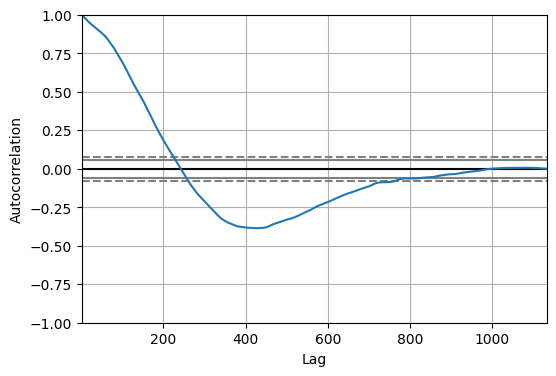

In [37]:
plt.figure(figsize=(6,4))
autocorrelation_plot(train)
plt.show()